In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
%matplotlib inline

In [5]:
#Read yelp.csv into a DataFrame.
data = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv")
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


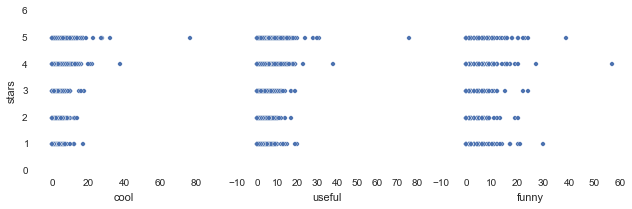

In [14]:
#Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.
sns.pairplot(data=data, x_vars=['cool', 'useful', 'funny'], y_vars=['stars'])

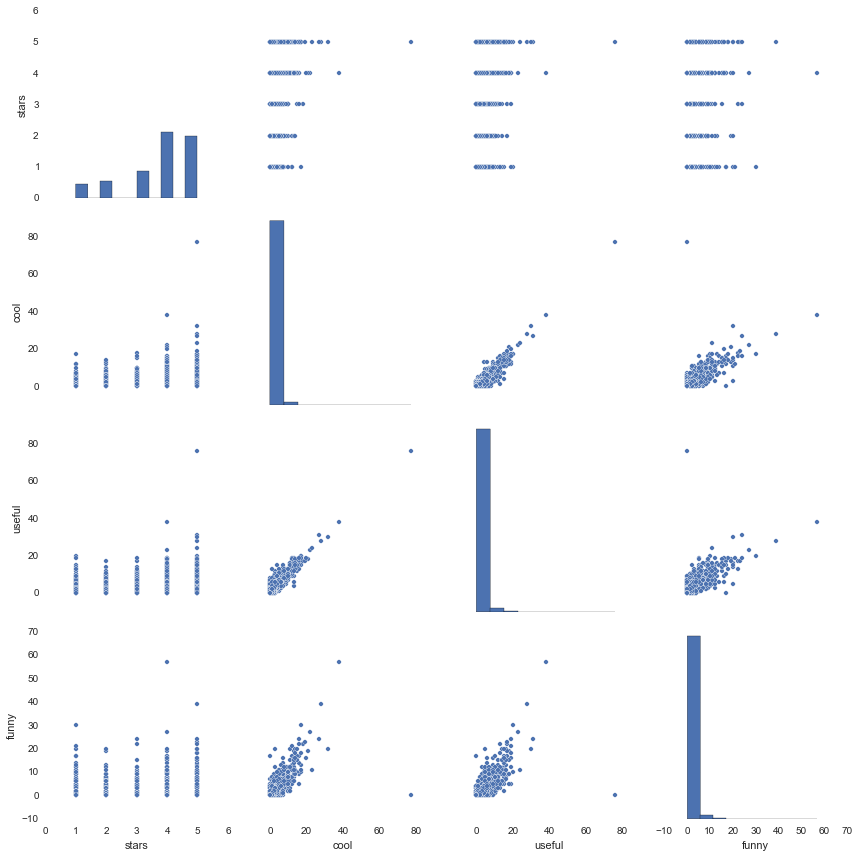

In [16]:
sns.pairplot(data=data, vars=['stars', 'cool', 'useful','funny'])

Cool, useful, and funny look quite correlated. The single best predictor appears to be cool, but it is not a very distinct relationship.

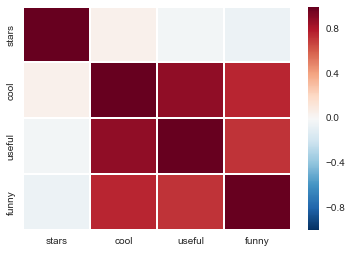

In [17]:
sns.heatmap(data.corr())

In [20]:
#Define cool/useful/funny as the features, and stars as the response.
feature_cols = ['cool', 'useful', 'funny']
X = data[feature_cols]
y = data.stars
X.head()

,cool,useful,funny
0,2,5,0
1,0,0,0
2,0,1,0
3,1,2,0
4,0,0,0


In [22]:
#Fit a linear regression model and interpret the coefficients. 
#Do the coefficients make intuitive sense to you? 
#Explore the Yelp website to see if you detect similar trends.
linreg = LinearRegression()
linreg.fit(X,y)
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


The 'cool' coefficient makes sense to me because I would expect people who can share a cool or interesting story to give the location a higher review. The other two coefficients however seem mispecified. Funny or useful reviews are polarizing and can go either way. A useful review reveals important details, either positive or negative. A funny review also finds extremes in expressing either a positive or negative view. I would hope that both of these coefficients are near zero relative to the 'cool' coefficient.

I see roughly the same trends that I expect when look at a few yelp reviews, since my previous expectation is based on my use of yelp.

In [28]:
#Evaluate the model by splitting it into training and testing sets and computing the RMSE. 
#Does the RMSE make intuitive sense to you?
def train_test_rmse(X, y, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [31]:
train_test_rmse(X, y, random_state=95)

1.1915023202384245

The Root Mean Squared Error looks a bit lower than I would expect. We only deviate by about one star on average.I wasn't expecting more accuracy than two or three stars.

In [ ]:
#Try removing some of the features and see if the RMSE improves.

In [33]:
feature_cols = ['cool']
X = data[feature_cols]
y = data.stars
train_test_rmse(X, y, random_state=175)

1.2237840566232734

In [37]:
feature_cols = ['cool', 'useful']
X = data[feature_cols]
y = data.stars
train_test_rmse(X, y, random_state=78)

1.2131011379067895

In [38]:
feature_cols = ['cool', 'funny']
X = data[feature_cols]
y = data.stars
train_test_rmse(X, y, random_state=325)

1.2380066155014886

In [39]:
feature_cols = ['useful', 'funny']
X = data[feature_cols]
y = data.stars
train_test_rmse(X, y, random_state=325)

1.2526926859485714

It appears using all three features is most likely to give best results.

###Bonus: Think of some new features you could create from the existing data that might be predictive of the response. (This is called "feature engineering".) Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

I would definitely add quadratic terms to capture the potential polarizing nature of reviews, however I will need to get back to this as I find some time between packing.

In [ ]:
#Bonus: Compare your best RMSE on testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean rating in the training set for all observations in the testing set.
#Bonus: Instead of treating this as a regression problem, treat it as a classification problem and see what testing accuracy you can achieve with KNN.
#Bonus: Figure out how to use linear regression for classification, and compare its classification accuracy to KNN.